/content/CompVisionAssignment


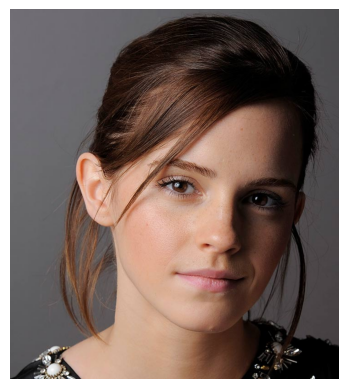

In [1]:
#!git clone https://github.com/piumixit/CompVisionAssignment

%cd CompVisionAssignment

from PIL import Image
import matplotlib.pyplot as plt

image_path = 'image/emma.jpg'
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b.

101
50
105
256


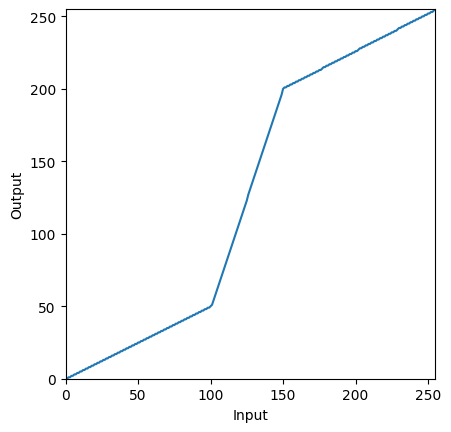

Text(0.5, 1.0, 'Transformed Image')

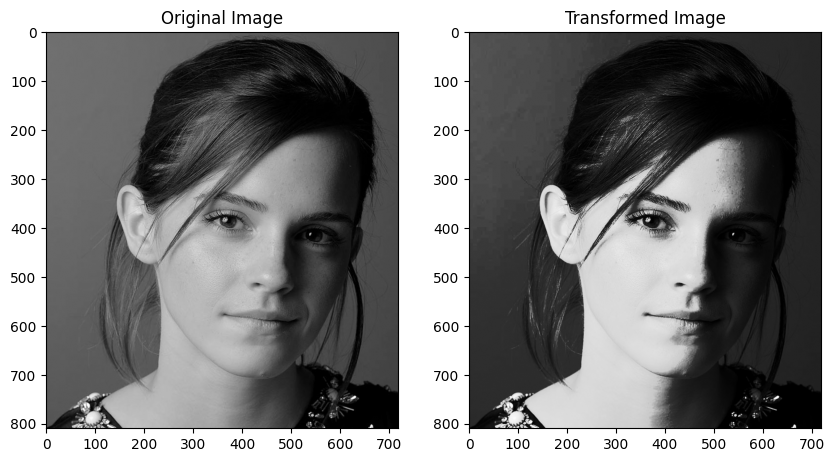

In [8]:
import cv2
import numpy as np

c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input')
ax.set_ylabel('Output')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

img = cv2.imread('image/emma.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
  print(f"Error: Could not load image at {img}")

out = cv2.LUT(img, transform)
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(out, cmap='gray')
ax[1].set_title('Transformed Image')